In [1]:
import pandas as pd
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import re
import matplotlib.pyplot as plt
import warnings
import random
from random import shuffle
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/94_character_TMNIST.csv')

In [4]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
all_ = list(df['labels'].unique())

'''pattern_uc = re.compile(r"[A-Z]")
pattern_lc = re.compile(r"[a-z]")
pattern_numbers = re.compile(r"[0-9]")
pattern_symbols = re.compile(r"[\W]|[\_\,]")

lower_case = pattern_lc.findall(str(all_))
Upper_case = pattern_uc.findall(str(all_))
Numbers_ = pattern_numbers.findall(str(all_))
Symbols_ = list(set(pattern_symbols.findall(str(all_))))
Symbols_.pop(27)
'''
final=all_

In [6]:
mapper={}
for x,y in enumerate(final):
    mapper[y]=str(x)



In [7]:
df['target']=df['labels'].map(mapper)

In [8]:
X = df.iloc[:, 2:-1].astype('float32')
y= df['target']

In [9]:
y.isna().sum()

0

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
Length, Height = 28,28
NC=y_train.nunique()

In [12]:
X_train = np.reshape(X_train.values, (X_train.shape[0] ,Length, Height))
X_test = np.reshape(X_test.values, (X_test.shape[0] ,Length, Height))

In [13]:
y_train = to_categorical(y_train, NC, dtype='int' )
y_test = to_categorical(y_test, NC, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(205569, 28, 28),(68524, 28, 28)
Y:Train, Test data shape:(205569, 94),(68524, 94)


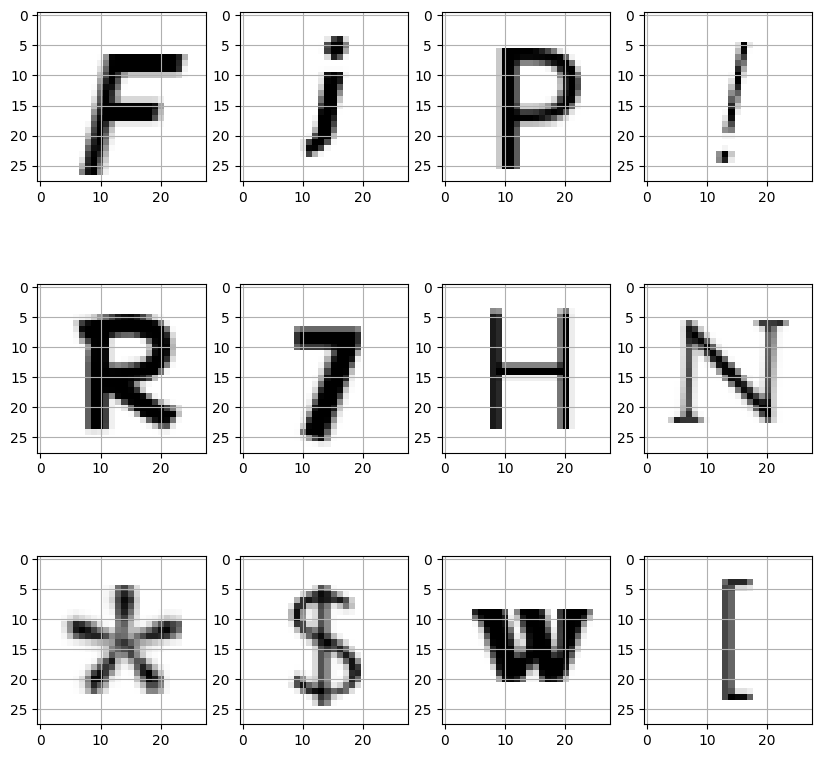

In [14]:
random = (X_train[:500]) #Randomly shuffle
fig,ax = plt.subplots(3,4 , figsize = (10,10))
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    axes[i].grid()


In [15]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
RGB = 1  # In this case only one instead of 3 because we dont have Color images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)

#normalizing the image data
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (205569, 28, 28, 1),(68524, 28, 28, 1)


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [19]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(Length, Height, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(NC, activation='softmax')
])



In [20]:
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
Batch_ = 128
Epochs_ = 5

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [21]:
model.fit(X_train,y_train, validation_data = (X_test,y_test),batch_size = Batch_ ,
                   epochs = Epochs_, verbose = 1)

Epoch 1/5
1607/1607 [==============================] - 216s 133ms/step - loss: 0.5362 - accuracy: 0.8446 - val_loss: 0.3568 - val_accuracy: 0.8959
Epoch 2/5
1607/1607 [==============================] - 208s 129ms/step - loss: 0.3442 - accuracy: 0.8967 - val_loss: 0.3975 - val_accuracy: 0.8835
Epoch 3/5
1607/1607 [==============================] - 204s 127ms/step - loss: 0.3332 - accuracy: 0.8998 - val_loss: 0.3590 - val_accuracy: 0.8963
Epoch 4/5
1607/1607 [==============================] - 197s 123ms/step - loss: 0.3241 - accuracy: 0.9030 - val_loss: 0.3424 - val_accuracy: 0.9021
Epoch 5/5
1607/1607 [==============================] - 204s 127ms/step - loss: 0.3225 - accuracy: 0.9030 - val_loss: 0.3437 - val_accuracy: 0.9015


1/1 [==============================] - 0s 37ms/step


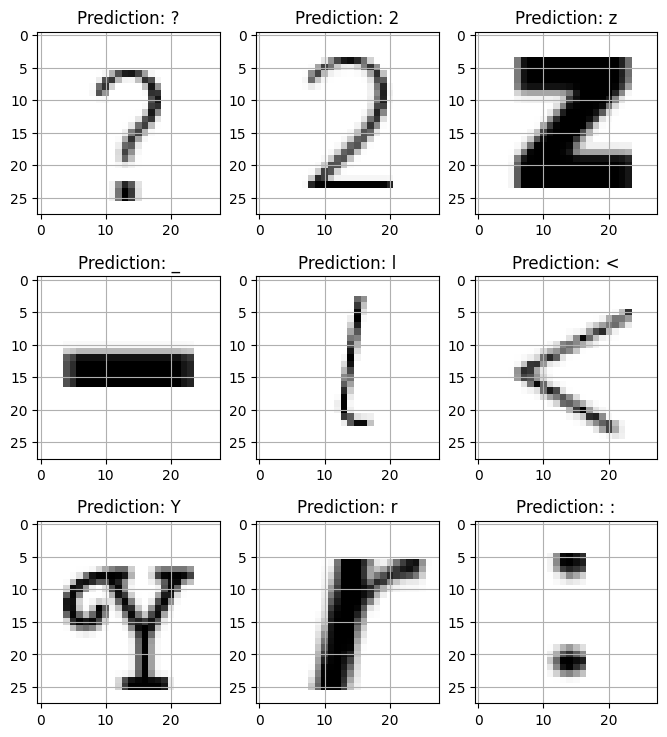

In [24]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1))
    pred = [k for k, v in mapper.items() if v == str(np.argmax(model.predict(img_final)))][0]
    ax.set_title("Prediction: "+pred)
    ax.grid()